###### Build a linear regression model that identifies the key drivers of interest rate for individual loans. Perform exploratory data analysis of the relationship between the features and relationship of the features with the response. Select your features and appropriate transformations and use statsmodels or sklearn to build a linear regression model.

###### You do not have to use all the variables. Focus on building the simplest model that explains interest rate. Justify the features you have or have not included in your model.

### Perform basic EDA

In [59]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt
import numpy as np

# read dataset.csv
bank_data = pd.read_csv("../data/bank_interest_model.csv")
# bank_data = bank_data.transpose()
print("\nPreview of bank dataset", bank_data.T.head(5))

# count the rows and columns in a DataFrame
print("\nNumber of rows and column in our DataFrame = ",bank_data.shape)


Preview of bank dataset                                0        1        2        3        4     \
interest_rate                   8.9    12.12    21.98     9.99    11.71   
fico_range                  735-739  715-719  690-694  695-699  695-699   
amount_requested            20000.0  19200.0  35000.0  10000.0  12000.0   
amount_funded_by_investors  20000.0  19200.0  35000.0   9975.0  12000.0   
loan_length                    36.0     36.0     60.0     36.0     36.0   

                               5        6        7        8        9     ...  \
interest_rate                 15.31      7.9    17.14    14.33     6.91  ...   
fico_range                  670-674  720-724  705-709  685-689  715-719  ...   
amount_requested             6000.0  10000.0  33500.0  14675.0   7000.0  ...   
amount_funded_by_investors   6000.0  10000.0  33450.0  14675.0   7000.0  ...   
loan_length                    36.0     36.0     60.0     36.0     36.0  ...   

                               2488     248

In [60]:
# displays the data type and information about the data
# 4/5 Dtypes are float64, 1/5 Dtypes are object
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


In [61]:
# Checking for duplication
# numbers represent how many unique values there are
bank_data.nunique()

interest_rate                 273
fico_range                     38
amount_requested              380
amount_funded_by_investors    708
loan_length                     2
dtype: int64

In [62]:
# checks for any null values
# zero null values found
bank_data.isnull().sum()

interest_rate                 0
fico_range                    0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
dtype: int64

#### What columns do we think are valuable when caculating interest rates?
- Fico scores should have a direct positive and negative correlation with interest rates
- Loan length should have a direct correlation with interest rates
- The column "amount_requested" does not represent a significant interest to this EDA 

In [63]:
# Drop amount_requested column
bank_data = bank_data.drop(columns='amount_requested')
print(bank_data)

      interest_rate fico_range  amount_funded_by_investors  loan_length
0              8.90    735-739                    20000.00         36.0
1             12.12    715-719                    19200.00         36.0
2             21.98    690-694                    35000.00         60.0
3              9.99    695-699                     9975.00         36.0
4             11.71    695-699                    12000.00         36.0
...             ...        ...                         ...          ...
2493          16.77    705-709                    29950.00         60.0
2494          14.09    740-744                    16000.00         60.0
2495          13.99    680-684                    10000.00         36.0
2496          12.42    675-679                     6000.00         36.0
2497          13.79    670-674                     5242.75         36.0

[2498 rows x 4 columns]


### Feature Engineering
- Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

In [64]:
# Given fico_range a numerical value based off its mean
bank_data['fico_range'] = bank_data['fico_range'].apply(lambda x: sum(map(int, x.split('-'))) / 2.0)

In [65]:
# visually confirmed fico_range values have been converted into numerical value
bank_data

,interest_rate,fico_range,amount_funded_by_investors,loan_length
0,8.90,737.0,20000.00,36.0
1,12.12,717.0,19200.00,36.0
2,21.98,692.0,35000.00,60.0
3,9.99,697.0,9975.00,36.0
4,11.71,697.0,12000.00,36.0
...,...,...,...,...
2493,16.77,707.0,29950.00,60.0
2494,14.09,742.0,16000.00,60.0
2495,13.99,682.0,10000.00,36.0
2496,12.42,677.0,6000.00,36.0


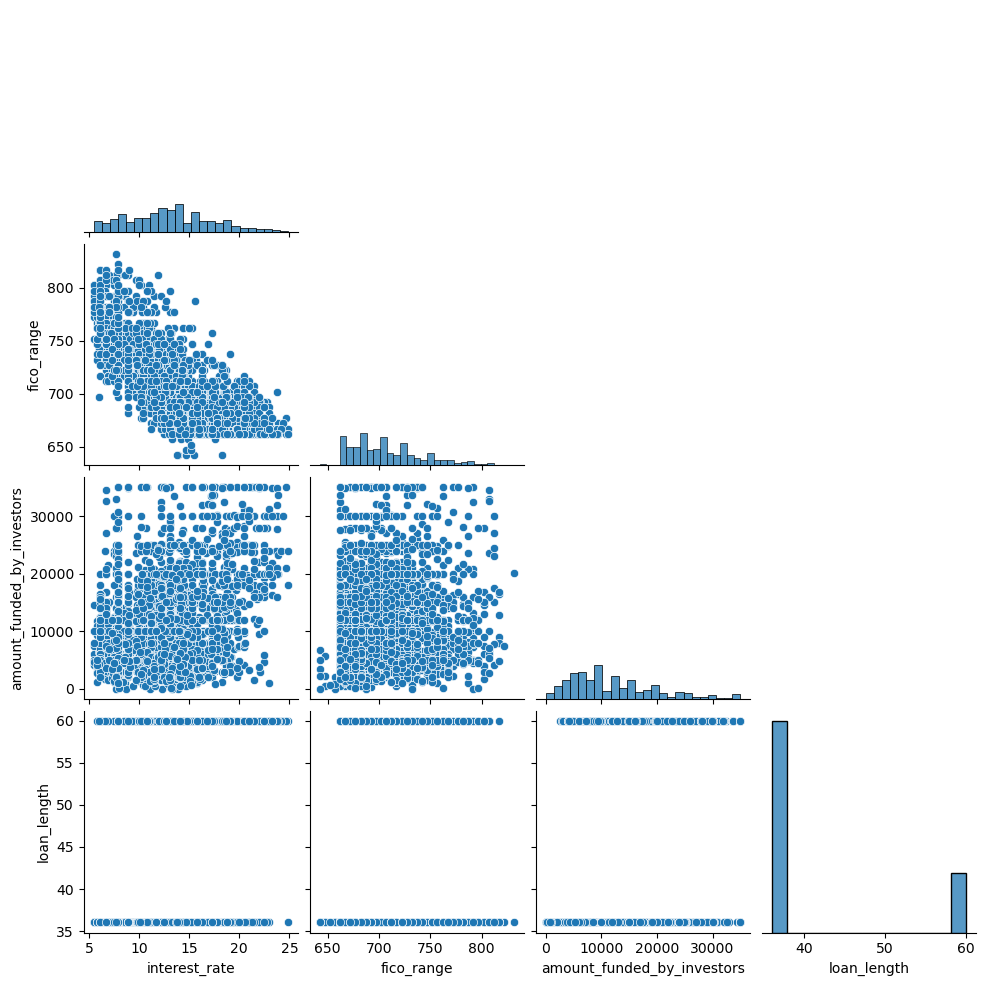

In [66]:
# created a pair plot to identify relationships between variables
sns.pairplot(data=bank_data, corner=True)

##### Make Features

In [67]:
# Creates OLS Regresssion Results
# Allows us to see what values are important to us by looking at the P value
# Observed p values are all zero
X_banking = sm.add_constant(bank_data[['fico_range', 'amount_funded_by_investors', 'loan_length']])
y_banking = bank_data['interest_rate']
model_banking = sm.OLS(y_banking, X_banking)
results_banking = model_banking.fit()
print(results_banking.summary())


                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     2433.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:09   Log-Likelihood:                -5407.3
No. Observations:                2498   AIC:                         1.082e+04
Df Residuals:                    2494   BIC:                         1.085e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<Axes: xlabel='predicted', ylabel='residuals'>

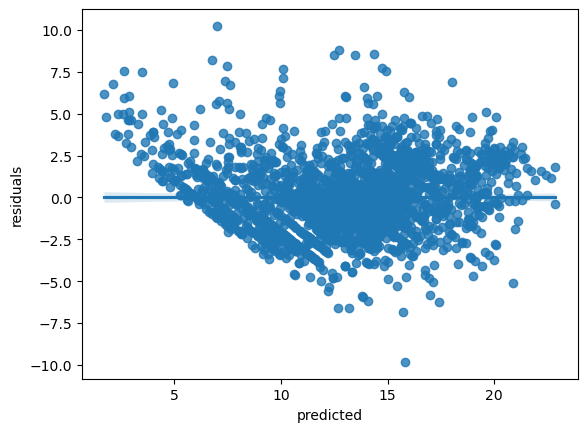

In [68]:
# Added columns predicted and residuals
bank_data['predicted'] = results_banking.predict(X_banking)
bank_data['residuals'] = y_banking - bank_data['predicted']

# Created regression plot
sns.regplot(x=bank_data['predicted'], y=bank_data['residuals'])

C:\Users\ashto\AppData\Local\Temp\ipykernel_16044\61167692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data_sample['predicted'] = results_banking.predict(X_banking)
C:\Users\ashto\AppData\Local\Temp\ipykernel_16044\61167692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data_sample['residuals'] = y_banking - bank_data_sample['predicted']


<Axes: xlabel='predicted', ylabel='residuals'>

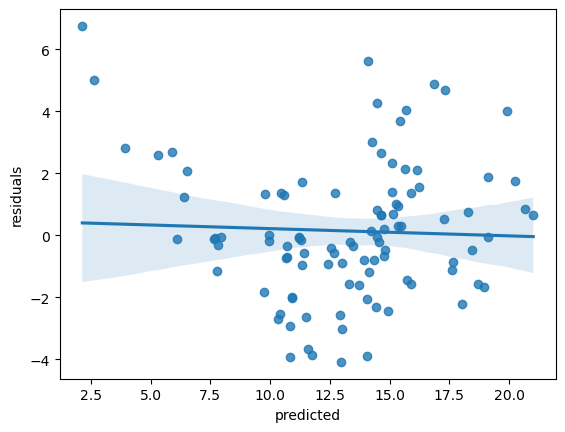

In [69]:
# Took a sample of 100 datapoints from bank_data
# Based off these samples we can check if the data is heteroscedastic
bank_data_sample = bank_data.head(100)
X_banking = sm.add_constant(bank_data_sample[['fico_range', 'amount_funded_by_investors', 'loan_length']])
y_banking = bank_data_sample['interest_rate']
bank_data_sample['predicted'] = results_banking.predict(X_banking)
bank_data_sample['residuals'] = y_banking - bank_data_sample['predicted']

# Created regression plot
sns.regplot(x=bank_data_sample['predicted'], y=bank_data_sample['residuals'])

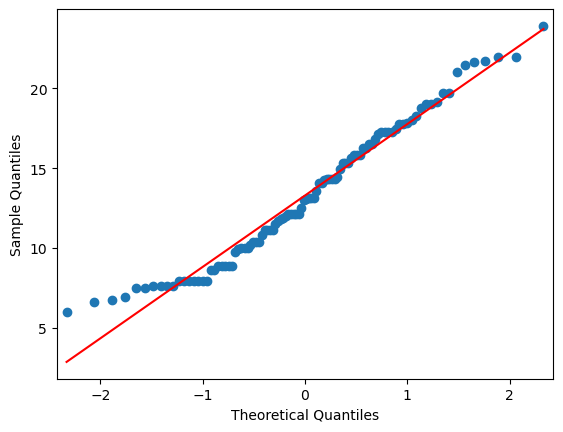

In [70]:
# Sort the P values
# Generates a linear regression graph
# Checking to see if the residuals are normally distributed
bank_sample_sorted = bank_data_sample['interest_rate'].sort_values()
sm.qqplot(bank_sample_sorted, line='r');

In [71]:
# What the eff is a Decision Tree
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_banking, y_banking)
y_tree_pred = tree.predict(X_banking)

In [72]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X_banking), max(X_banking), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X_tree, y_tree, color = 'red')
  
# plot predicted data
plt.plot(X_grid, tree.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Balance to Limit (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Limit')
  
# specify Y axis label
plt.ylabel('Balance')
  
# show the plot
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'